## Principal Component Analysis (PCA) on Iris Dataset

#### Author - Agyeya Mishra

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
#Feature names and Encoding of target variables
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['CLASS'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   CLASS              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
x = data.iloc[:,:4]  #features
y = data.iloc[:,4] #target

x.shape, y.shape

((150, 4), (150,))

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(x)

In [9]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [10]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

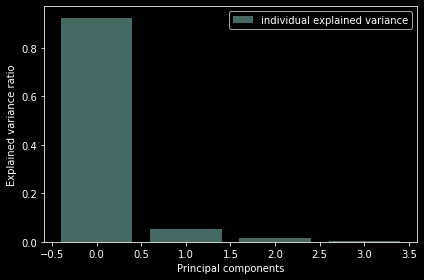

In [11]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [12]:
pca = PCA(n_components=3)
X = pca.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(7)

In [17]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
0.9777777777777777
